In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from itertools import permutations 
from time import time
import scipy
import seaborn as sns

In [2]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Estimating the mean vector.
def mean_vec(X):
    return np.mean(X, axis=0)

# Source Dataset

In [3]:
# Generate synthetic dataset for source data

a=np.random.normal(0, 1, size=(50, 2)) 
df1 = pd.DataFrame(a, columns =['x1', 'x2'])
df1['y'] = 0

b=np.random.normal(2, 1.5, size=(50, 2)) #class 1
df2 = pd.DataFrame(b, columns =['x1', 'x2'])
df2['y'] = 1

df_s = pd.concat([df1,df2], ignore_index=True, axis=0)
X_s = df_s.iloc[:,:2]
y_s = df_s['y']
df_s

,x1,x2,y
0,-0.150506,-0.161995,0
1,-0.371091,0.290842,0
2,-0.970196,0.059762,0
3,1.418143,-0.218789,0
4,0.860220,0.917549,0
...,...,...,...
95,2.807399,-0.093335,1
96,0.811895,1.362646,1
97,2.617401,3.359121,1
98,1.363158,1.645785,1


class 0 specify vector mean and vector cov

https://numpy.org/doc/stable/reference/random/generator.html
    
https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

In [4]:
# Calculate mean vector for source dataset
mu_s = mean_vec(X_s) 

# Calculate covariance matrix for source dataset
cov_s = cov_mat(X_s.T) # (or with np.cov(X.T))

print('Mean Vector for Source data: \n', mu_s, '\n')
print('Covariance matrix for Source data: \n', cov_s)

Mean Vector for Source data: 
 x1    1.109688
x2    1.096901
dtype: float64 

Covariance matrix for Source data: 
 [[ 6.59989572e-05 -3.80248263e-03]
 [-3.80248263e-03  2.19077312e-01]]


Source Covariance matrix is symmetric and positive definite

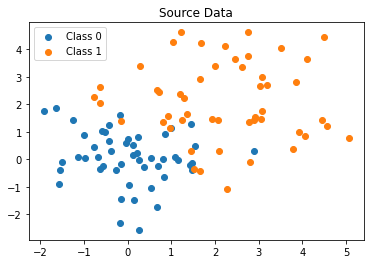

In [5]:
X_s ,y_s = np.asarray(X_s), np.asarray(y_s)
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y_s == class_value)
    # create scatter of these samples
    plt.scatter(X_s[row_ix, 0], X_s[row_ix, 1])
# show the plot
plt.title('Source Data')
plt.legend(['Class 0', 'Class 1'])
plt.show()

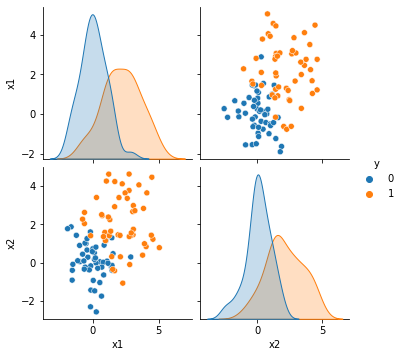

In [6]:
sns.pairplot(vars=["x1","x2"], data=df_s, hue="y")

# Target Dataset

In [7]:
# Generate synthetic dataset for target data

c=np.random.normal(1, 3, size=(50, 2)) #class 0
df3 = pd.DataFrame(c, columns =['x1', 'x2'])
df3['y'] = 0

d=np.random.normal(4, 2, size=(50, 2)) #class 1
df4 = pd.DataFrame(d, columns =['x1', 'x2'])
df4['y'] = 1

df_t = pd.concat([df3,df4], ignore_index=True, axis=0)
X_t = df_t.iloc[:,:2]
y_t = df_t['y']
df_t

,x1,x2,y
0,3.547397,5.058548,0
1,-0.636718,-0.974476,0
2,-0.550985,1.814486,0
3,-5.216241,2.570888,0
4,1.351532,0.913556,0
...,...,...,...
95,6.521660,4.036030,1
96,4.216413,3.585156,1
97,3.392062,5.099083,1
98,4.396747,6.008596,1


In [8]:
# Calculate mean vector for target dataset
mu_t = mean_vec(X_t) 

# Calculate covariance matrix for target dataset
cov_t = cov_mat(X_t.T) # (or with np.cov(X.T))

print('Mean Vector for Target data: \n', mu_t, '\n')
print('Covariance matrix for Target data: \n', cov_t)


Mean Vector for Target data: 
 x1    2.493624
x2    2.682632
dtype: float64 

Covariance matrix for Target data: 
 [[ 1.14178895 -0.25520146]
 [-0.25520146  0.05704013]]


Target Covariance matrix is symmetric and positive definite

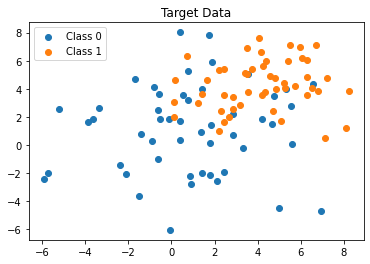

In [9]:
X_t, y_t = np.asarray(X_t), np.asarray(y_t)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y_t == class_value)
    # create scatter of these samples
    plt.scatter(X_t[row_ix, 0], X_t[row_ix, 1])
# show the plot
plt.title('Target Data')
plt.legend(['Class 0', 'Class 1'])
plt.show()

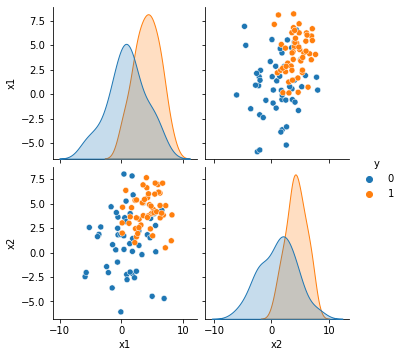

In [10]:
sns.pairplot(vars=["x1","x2"], data=df_t, hue="y")

In [11]:
# Probability of y
p_y = (len(df_s[df_s['y']==0]))/len(df_s)
p_y

0.5

P(y) is same for both source and target

In [12]:
# specify pdf functions for dataset specify covariance and then do random draws 
# use numpy.random.generate

# p(x), p(y|x), p(x|y), p(y)
# specify p(x,y)
# We want to change p(x) and keep p(y) constant
# cov matrix have to be symmteric and positive definite

In [13]:
class subspace:
    def __init__(self,dataset,S,T,d):
        self.dataset = dataset
        self.S = S
        self.T = T
        self.d = d
#         print(self.S)
    def pca(self,x, n_components):
        cov = np.cov(x , rowvar = False)
        eigen_values , eigen_vectors = np.linalg.eigh(cov)
        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigenvalue = eigen_values[sorted_index]
        sorted_eigenvectors = eigen_vectors[:,sorted_index]
        return sorted_eigenvectors[:,0:n_components]
    def fit_predict(self):
        #normalising the data
        scale = StandardScaler()
        x_S = self.S.iloc[:,:2]
        x_T = self.T.iloc[:,:2]
        x_T = scale.fit_transform(x_T)
        x_S = scale.fit_transform(x_S)
        
#         print(x_S)
#         print(x_T)
        
        y_S = self.S.iloc[:,-1]
        y_T = self.T.iloc[:,-1]
#         print(y_S)
#         print(y_T)
        
        #pca and picking the top eigen vectors
        xs = self.pca(x_S,self.d)
        xt = self.pca(x_T,self.d)
        xa = np.dot(np.dot(xs,xs.T),xt)
        sa = np.dot(x_S,xa)
        st = np.dot(x_T,xt)
        
        #gnb classifier
        gnb = GaussianNB()
        gnb.fit(sa,y_S)
        labels = gnb.predict(st)
        return accuracy_score(labels,y_T)
    
def gnb(dataset,S,T):
    
    x_S = S.iloc[:,:1]
    x_T = S.iloc[:,:1]
    y_S = S.iloc[:,-1]
    y_T = T.iloc[:,-1]
    scale = StandardScaler()
    x_S = scale.fit_transform(x_S)
    x_T = scale.fit_transform(x_T)
    gnb = GaussianNB()
    gnb.fit(x_S,y_S)
    labels = gnb.predict(x_T)
    return accuracy_score(labels,y_T)

Plots for decision boundaries and regions on source and target after subspace alignment

Test with Linear base and quadratic base 

Try 2-3 with different mean and covariances

In [19]:
data_list = [df_s,df_t]
data_iter = list(permutations(data_list,2))
# data_iter

In [15]:
list1 = ["dist1","dist2"]
index = list(permutations(list1,2))
# print(index)
methods = ["subspace","without subspace"]
data_timedf = pd.DataFrame(index=index,columns=methods)
data_accdf = pd.DataFrame(index=index,columns=methods)

for i in range(len(index)):
    t0 = time()
    sub = subspace(df_s,data_iter[i][0],data_iter[i][1],2)
    data_accdf.iloc[i,0] = sub.fit_predict()*100
    t1 = time()
    data_timedf.iloc[i,0] = t1-t0
    t2 = time()
    data_accdf.iloc[i,1] = gnb(df_s,data_iter[i][0],data_iter[i][1])*100
    t3 = time()
    data_timedf.iloc[i,1] = t3-t2

In [16]:
data_accdf

,subspace,without subspace
"(dist1, dist2)",79.0,82.0
"(dist2, dist1)",85.0,78.0


In [17]:
data_timedf

,subspace,without subspace
"(dist1, dist2)",0.00796,0.003321
"(dist2, dist1)",0.003577,0.00318
